In [73]:
## import required modules

In [93]:
import pandas

import matplotlib.pyplot as plt
import sklearn

import numpy

import seaborn

In [74]:
#read data from files

In [76]:
data = pandas.read_csv('C:/Users/Vasi/Pictures/Camera Roll/raw_data5.csv')
data1 =pandas.read_csv('C:/Users/Vasi/Downloads/raw_data1.csv')
data2 =pandas.read_csv('C:/Users/Vasi/Downloads/raw_data2.csv')
data3 =pandas.read_csv('C:/Users/Vasi/Downloads/raw_data3.csv')
data4 =pandas.read_csv('C:/Users/Vasi/Downloads/raw_data4.csv')

In [77]:
data4.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Contracted from which Patient (Suspected),Notes,Source_1,Source_2,Source_3,Nationality,Type of transmission,Status Change Date,Patient Number
0,10009.0,NaN,10/05/2020,NaN,NaN,NaN,Ajmer,Rajasthan,RJ,2,Hospitalized,NaN,NaN,https://twitter.com/ANI/status/125933138485177...,NaN,NaN,NaN,NaN,NaN,37900.0
1,10010.0,NaN,10/05/2020,NaN,NaN,NaN,Dungarpur,Rajasthan,RJ,1,Hospitalized,NaN,NaN,https://twitter.com/ANI/status/125933138485177...,NaN,NaN,NaN,NaN,NaN,37901.0
2,10011.0,NaN,10/05/2020,NaN,NaN,NaN,Jaipur,Rajasthan,RJ,10,Hospitalized,NaN,NaN,https://twitter.com/ANI/status/125933138485177...,NaN,NaN,NaN,NaN,NaN,37902.0
3,10012.0,NaN,10/05/2020,NaN,NaN,NaN,Kota,Rajasthan,RJ,9,Hospitalized,NaN,NaN,https://twitter.com/ANI/status/125933138485177...,NaN,NaN,NaN,NaN,NaN,37903.0
4,10013.0,NaN,10/05/2020,NaN,NaN,NaN,Pali,Rajasthan,RJ,2,Hospitalized,NaN,NaN,https://twitter.com/ANI/status/125933138485177...,NaN,NaN,NaN,NaN,NaN,37904.0


In [78]:
#get the list of states
state=data['Detected State'].dropna().unique()
state=list(state)

In [79]:
#get the number of cases in each state from eachn file
states = {}
for st in state:
    states[st]=[]
    states[st].append(numpy.sum((data1['Num cases'].where(data1['Detected State']==st))))
    states[st].append(numpy.sum((data2['Num cases'].where(data2['Detected State']==st))))
    states[st].append(numpy.sum((data3['Num Cases'].where(data3['Detected State']==st).where(data3['Current Status']!='Recovered'))))
    states[st].append(numpy.sum((data4['Num Cases'].where(data4['Detected State']==st).where(data4['Current Status']!='Recovered'))))
    states[st].append(numpy.sum((data['Num Cases'].where(data['Detected State']==st).where(data['Current Status']!='Recovered'))))

In [92]:
#look how cool our dictionary is now. They keys are all state names and the values are the lists with 5 elements correspond-
#ing to the number of cases upto that date (from each of the 5 files)   :)
states

{'State Unassigned': [0.0, 0.0, 0.0, 1899.0, 3592.0],
 'Odisha': [61.0, 42.0, 251.0, 921.0, 681.0],
 'Assam': [35.0, 1.0, 27.0, 292.0, 926.0],
 'Rajasthan': [1478.0, 707.0, 1588.0, 3088.0, 1985.0],
 'Goa': [7.0, 0.0, 0.0, 48.0, 15.0],
 'Chandigarh': [26.0, 10.0, 135.0, 57.0, 67.0],
 'Bihar': [96.0, 181.0, 337.0, 1789.0, 1292.0],
 'Delhi': [2003.0, 915.0, 3638.0, 6531.0, 5824.0],
 'Andhra Pradesh': [647.0, 450.0, 846.0, 796.0, 863.0],
 'Ladakh': [18.0, 2.0, 22.0, 7.0, 28.0],
 'Manipur': [2.0, 0.0, 0.0, 27.0, 37.0],
 'Haryana': [250.0, 46.0, 385.0, 463.0, 914.0],
 'Himachal Pradesh': [39.0, 1.0, 16.0, 134.0, 134.0],
 'Uttarakhand': [44.0, 7.0, 17.0, 177.0, 563.0],
 'Karnataka': [390.0, 113.0, 303.0, 1178.0, 970.0],
 'Tamil Nadu': [1477.0, 408.0, 4670.0, 9037.0, 5731.0],
 'Kerala': [402.0, 67.0, 37.0, 290.0, 419.0],
 'Gujarat': [1743.0, 1558.0, 4817.0, 6229.0, 2865.0],
 'West Bengal': [310.0, 301.0, 1326.0, 1771.0, 1711.0],
 'Jharkhand': [41.0, 41.0, 74.0, 194.0, 246.0],
 'Jammu and Kashm

In [81]:
state_names = list(states.keys())
values_list = list(states.values())


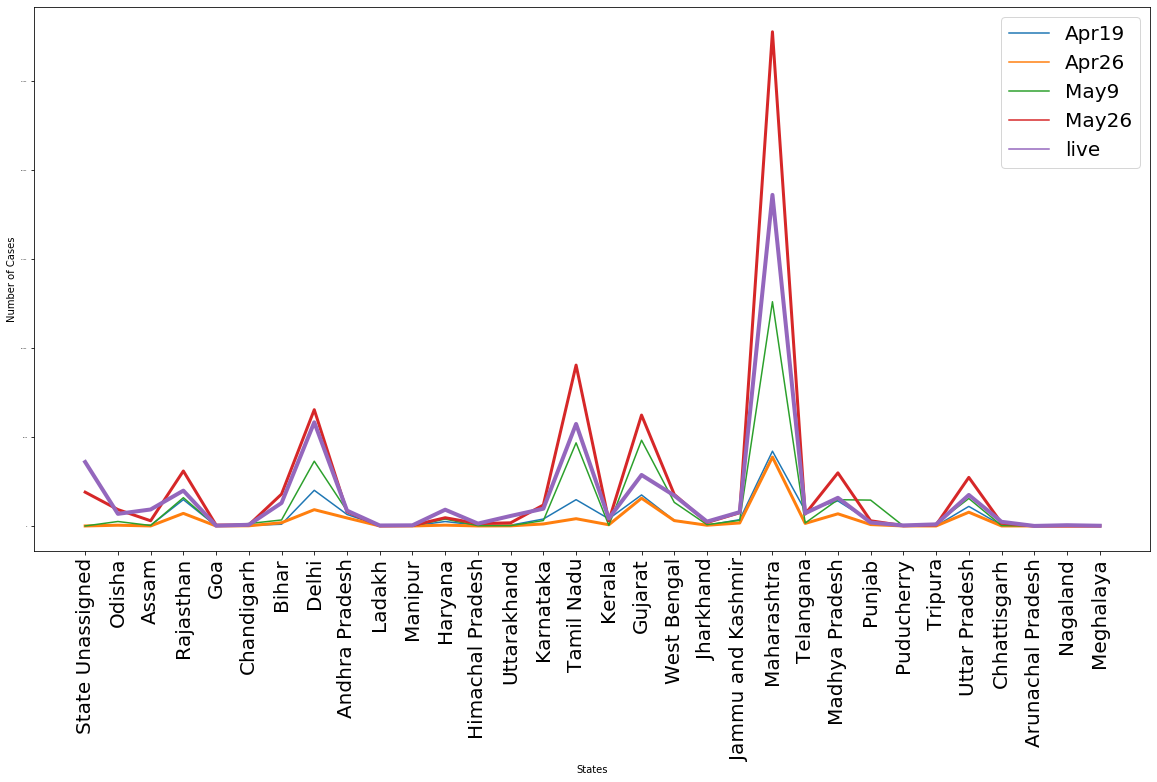

In [82]:
#this is how I visualized the data
plt.figure(figsize=(20,10))
apr1=plt.plot(state_names,[i[0] for i in values_list],label='Apr19')
apr2=plt.plot([i[1] for i in values_list],label='Apr26')
may1=plt.plot([i[2] for i in values_list],label='May9')
may2=plt.plot([i[3] for i in values_list],label='May26')
may3=plt.plot([i[4] for i in values_list],label='live')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of Cases')
plt.legend(fontsize=20)
plt.setp(may3,linewidth=4)
plt.setp(apr2,linewidth=3)
plt.setp(may2,linewidth=3)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=2) 

In [83]:
# let us now look at only the data that is in the end of may. get the recovered and deceased  stats too
data['recovered'] = data['Num Cases'].where(data['Current Status']=='Recovered')
data['deceased'] = data['Num Cases'].where(data['Current Status']=='Deceased')

In [86]:
# fill the null values with 0's
data['recovered']=data['recovered'].fillna(0)
data['deceased']=data['deceased'].fillna(0)

#get the stats
recov_state={}
dec_state=[]
for st in state:
    dec_state.append(numpy.sum((data['deceased'].where(data['Detected State']==st))))
    recov_state[st]=numpy.sum((data['recovered'].where(data['Detected State']==st)))

recov_cases= list(recov_state.values())

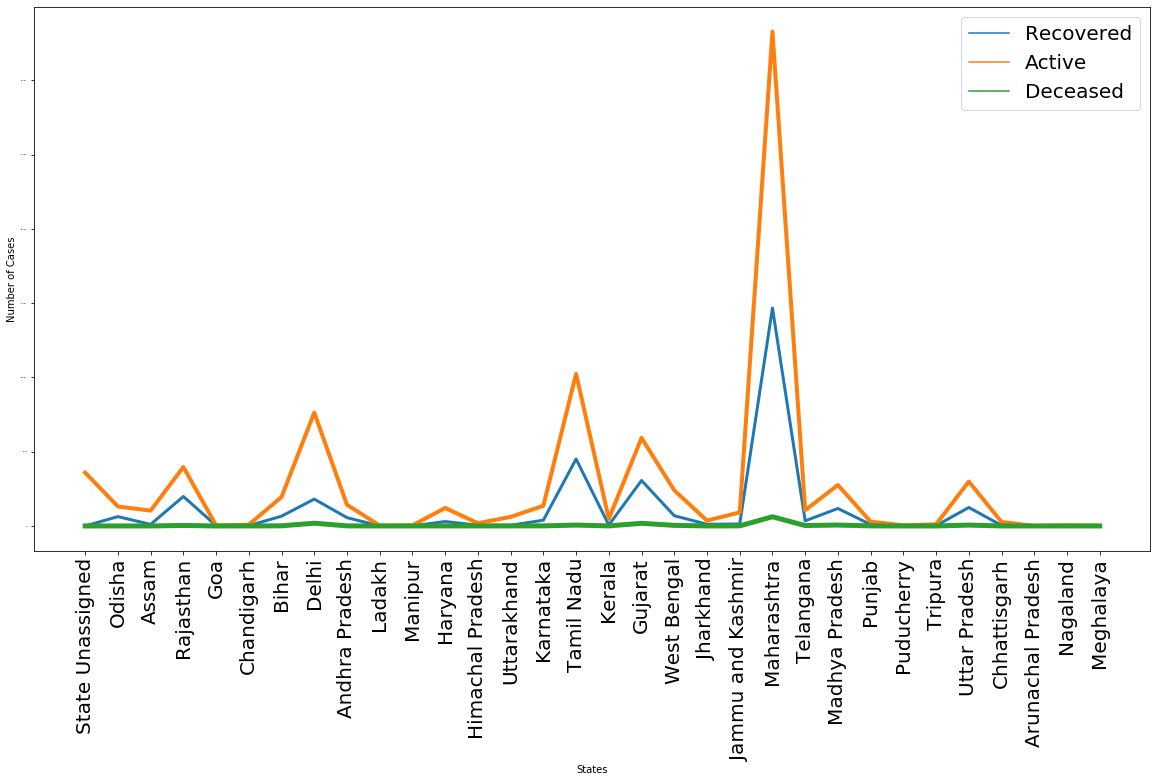

In [87]:
#VISUALIZE
plt.figure(figsize=(20,10))
rec=plt.plot(state,recov_cases,label='Recovered')
active=plt.plot(sumofstate,label='Active')
dec=plt.plot(dec_state,label='Deceased')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of Cases')
plt.legend(fontsize=20)
plt.setp(active,linewidth=4)
plt.setp(rec,linewidth=3)
plt.setp(dec,linewidth=5)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=2) 

In [88]:
# now let us look at the data from Telangana state only
ts_data = data[data['Detected State']=='Telangana']

In [89]:
# get the list of districts
districts=list(ts_data['Detected District'].dropna().unique())

In [90]:
recov_dist=[]
dec_dist=[]
total=[]
for st in districts:
    dec_dist.append(numpy.sum((ts_data['deceased'].where(ts_data['Detected District']==st))))
    recov_dist.append(numpy.sum((ts_data['recovered'].where(ts_data['Detected District']==st))))
    total.append(numpy.sum((ts_data['Num Cases'].where(ts_data['Detected District']==st))))

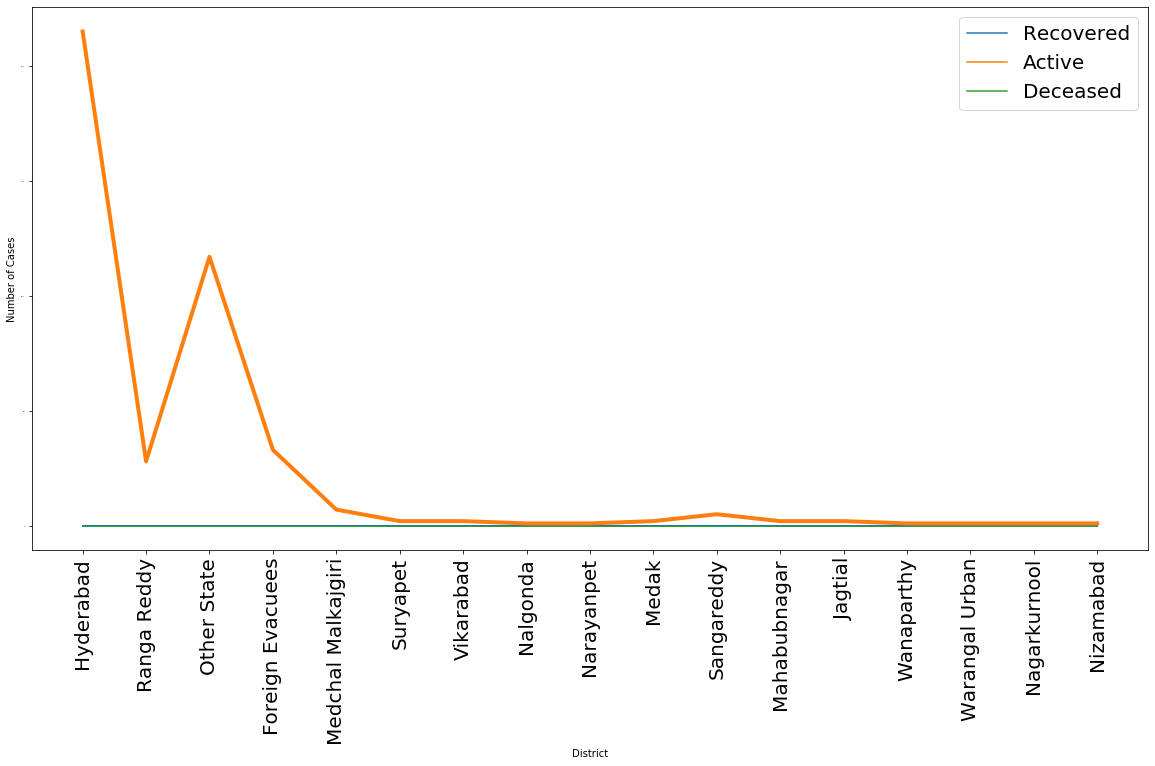

In [95]:
#VISUALIZE
plt.figure(figsize=(20,10))
rec=plt.plot(districts,recov_dist,label='Recovered')
active=plt.plot(total,label='Active')
dec=plt.plot(dec_dist,label='Deceased')
plt.xticks(rotation=90)
plt.yticks(visible=True)
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.legend(fontsize=20)
plt.setp(active,linewidth=4)
plt.setp(rec,linewidth=2)
plt.setp(dec,linewidth=1)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=2) 

In [ ]:
#the recovered and deceased lines almost coincided. Look carefully. If I increase the thickness of one line, the other may 
# disappear.     You're free to change the thickness in above cell interchangeably for both lines and see the difference.